In [27]:
# -- Active: 1711587569847@@127.0.0.1@5432@postgres
import psycopg2
import csv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
conn = psycopg2.connect("dbname=postgres")
curs = conn.cursor()
exec = curs.execute("SELECT * FROM krisha")
df = pd.read_sql_query("SELECT * FROM krisha", conn)
curs.close()
conn.close()

/var/folders/4f/6p5grl8s71sglcbf5mdbwjr8jrtrnz/T/ipykernel_53149/385664104.py:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query("SELECT * FROM krisha", conn)


In [18]:
df.owner_type.value_counts()

owner_type
Хозяин недвижимости    323
Специалист             232
Компания                33
Name: count, dtype: int64

In [56]:
df_owner = df[df.owner_type == "Хозяин недвижимости"]
df_special = df[df.owner_type == "Специалист"]
df_company = df[df.owner_type == "Компания"]

In [57]:
owners_counts = df_owner.groupby('contact').size()
owners_with_more_than_3_appearances = owners_counts[owners_counts > 1]
owners_more_than_3_apartments_df = df_owner[df_owner['contact'].isin(owners_with_more_than_3_appearances.index)]

In [58]:
# owners_with_more_than_3_appearances = owners_counts[owners_counts > 1]
# owners_with_more_than_3_appearances
owners_more_than_3_apartments_df.sort_values(by="contact")

,id,owner_type,contact,price,appartment_description,urls,rooms,apartment_size,floors,rent,districts,addresses
517,634,Хозяин недвижимости,+7 701 255 2101,250000.0,"жил. комплекс Jetisu Park, меблирована полност...",https://krisha.kz/a/show/686789187,1-комнатная квартира,40 м²,13/13 этаж,помесячно,Жетысуский р-н,Есенова 160/3 — Суюнбая - Баянаульская
148,190,Хозяин недвижимости,+7 701 255 2101,280000.0,"жил. комплекс Jetisu Park, меблирована полност...",https://krisha.kz/a/show/690334476,2-комнатная квартира,45 м²,13/13 этаж,помесячно,Жетысуский р-н,Есенова 160/3 — Суюнбая
564,758,Хозяин недвижимости,+7 701 710 2573,400000.0,"жил. комплекс Акварель, Евроремонт, чистая, ую...",https://krisha.kz/a/show/687385988,2-комнатная квартира,60 м²,10/12 этаж,помесячно,Бостандыкский р-н,Сатпаева 90 — Туркебаева
172,282,Хозяин недвижимости,+7 701 710 2573,500000.0,"жил. комплекс Riviera, Сдаётся квартира с евро...",https://krisha.kz/a/show/691426646,2-комнатная квартира,81 м²,9/16 этаж,помесячно,Бостандыкский р-н,Сатпаева 90/43а
44,60,Хозяин недвижимости,+7 702 113 9111,220000.0,"жил. комплекс Alatau City, меблирована полностью",https://krisha.kz/a/show/691524268,2-комнатная квартира,58 м² помесячно',58 м² помесячно' этаж,'58 м² помесячно,Алатауский р-н,Дарабоз 53
242,340,Хозяин недвижимости,+7 702 113 9111,250000.0,"жил. комплекс Alatau City, меблирована полност...",https://krisha.kz/a/show/684464041,1-комнатная квартира,45 м²,3/12 этаж,помесячно,Алатауский р-н,Дарабоз 81
14,13,Хозяин недвижимости,+7 705 205 7254,160000.0,"меблирована полностью, 1 ком. кв Один или два ...",https://krisha.kz/a/show/689604518,1-комнатная квартира,20 м²,1/2 этаж,помесячно,Алмалинский р-н,Туркменская
29,45,Хозяин недвижимости,+7 705 205 7254,240000.0,"меблирована полностью, 1 ком. квартира студия....",https://krisha.kz/a/show/680565603,1-комнатная квартира,35 м²,1/2 этаж,помесячно,Алмалинский р-н,Туркменская — Назарбаева-Жансугурова
83,103,Хозяин недвижимости,+7 705 565 3322,180000.0,"меблирована полностью, 1 комнатная квартира (с...",https://krisha.kz/a/show/690715150,1-комнатная квартира,30 м²,9/10 этаж,помесячно,Наурызбайский р-н,мкр Калкаман-2
111,141,Хозяин недвижимости,+7 705 565 3322,200000.0,"жил. комплекс Qalqaman, меблирована полностью,...",https://krisha.kz/a/show/690706899,1-комнатная квартира,30 м²,4/10 этаж,помесячно,Наурызбайский р-н,мкр Калкаман-2


In [43]:
owners_counts.unique()

array([1, 2])

In [7]:
df.head(10)

,id,owner_type,contact,price,appartment_description,urls,rooms,apartment_size,floors,rent,districts,addresses
0,0,Компания,+7 747 975 2075,250000.0,"жил. площадь 20 м², кухня 12 м², меблирована п...",https://krisha.kz/a/show/691390570,1-комнатная квартира,43 м²,5/10 этаж,помесячно,Медеуский р-н,Нусупбекова — Янушкевича
1,1,Специалист,+7 778 778 2165,260000.0,"меблирована полностью, В отличном состояние!",https://krisha.kz/a/show/690991367,2-комнатная квартира,66 м²,7/9 этаж,помесячно,Алатауский р-н,мкр Аккент 4
2,2,Специалист,+7 707 322 2190,250000.0,"жил. площадь 45 м², кухня 14 м², меблирована ч...",https://krisha.kz/a/show/690986537,3-комнатная квартира,74 м²,7/9 этаж,помесячно,Ауэзовский р-н,мкр Мамыр-4 302
3,3,Хозяин недвижимости,+7 775 471 2061,300000.0,"жил. комплекс Alem City, меблирована полностью...",https://krisha.kz/a/show/688759950,2-комнатная квартира,77 м²,7/9 этаж,помесячно,Наурызбайский р-н,мкр Шугыла Мкр. Шугыла — ЦОН Наурызбайского р...
4,4,Хозяин недвижимости,+7 778 789 1174,450000.0,"жил. комплекс RAIYMBEK, меблирована полностью,...",https://krisha.kz/a/show/690832414,2-комнатная квартира,65 м²,10/13 этаж,помесячно,Алмалинский р-н,Просп. Назарбаева 28
5,5,Хозяин недвижимости,+7 747 339 9999,230000.0,Квартиран хорошо состоянии от хозяина удобное ...,https://krisha.kz/a/show/691118305,1-комнатная квартира,40 м²,2/12 этаж,помесячно,-,Абдуллы розыбакиева 51
6,6,Хозяин недвижимости,+7 701 229 1299,420000.0,"жил. комплекс Комфорт Сити, меблирована полнос...",https://krisha.kz/a/show/691279772,2-комнатная квартира,47 м²,18/20 этаж,помесячно,Бостандыкский р-н,Гагарина 310 — Аль-фараби -Гагарина
7,7,Хозяин недвижимости,+7 776 200 7770,300000.0,Сдам квартиру семейный паре. Школа Садик рядом...,https://krisha.kz/a/show/690616732,2-комнатная квартира,68 м²,2/5 этаж,помесячно,Медеуский р-н,мкр Думан-2 28
8,8,Хозяин недвижимости,+7 747 778 2906,400000.0,"жил. комплекс Oscar, меблирована полностью, Сд...",https://krisha.kz/a/show/690831583,2-комнатная квартира,50 м²,11/12 этаж,помесячно,Медеуский р-н,Баишева 28
9,9,Специалист,+7 747 592 8958,220000.0,"меблирована полностью, Квартира в хорошем сост...",https://krisha.kz/a/show/690621656,1-комнатная квартира,40 м²,9/9 этаж,помесячно,Бостандыкский р-н,мкр Орбита-3


<Axes: xlabel='districts'>

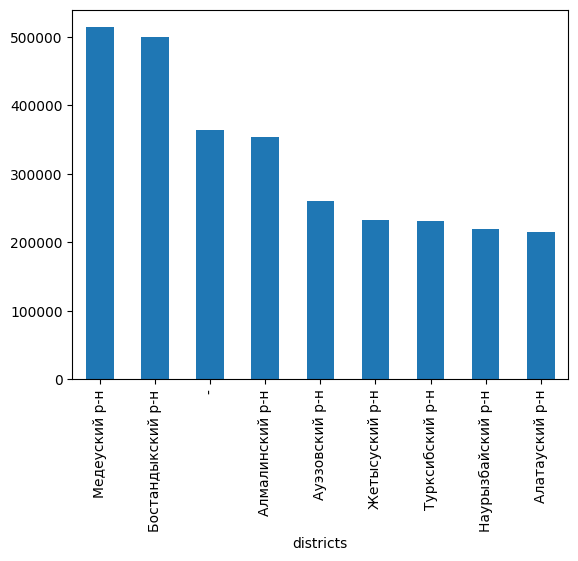

In [19]:
df.groupby("districts")["price"].mean().sort_values(ascending=False).plot(kind="bar")

<Axes: xlabel='price', ylabel='Count'>

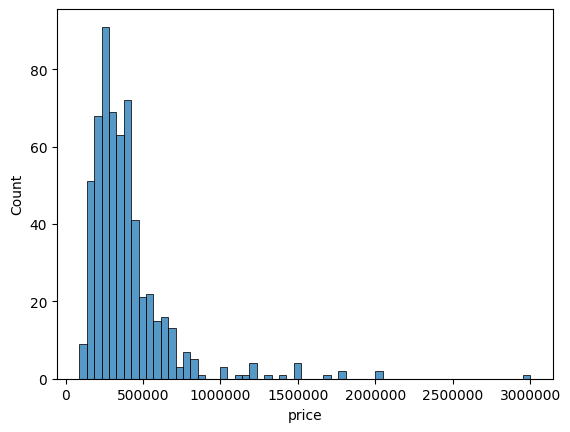

In [20]:
plt.ticklabel_format(style='plain')
sns.histplot(df["price"])

In [22]:
df.head(3)

,id,owner_type,contact,price,appartment_description,urls,rooms,apartment_size,floors,rent,districts,addresses
0,0,Компания,+7 747 975 2075,250000.0,"жил. площадь 20 м², кухня 12 м², меблирована п...",https://krisha.kz/a/show/691390570,1-комнатная квартира,43 м²,5/10 этаж,помесячно,Медеуский р-н,Нусупбекова — Янушкевича
1,1,Специалист,+7 778 778 2165,260000.0,"меблирована полностью, В отличном состояние!",https://krisha.kz/a/show/690991367,2-комнатная квартира,66 м²,7/9 этаж,помесячно,Алатауский р-н,мкр Аккент 4
2,2,Специалист,+7 707 322 2190,250000.0,"жил. площадь 45 м², кухня 14 м², меблирована ч...",https://krisha.kz/a/show/690986537,3-комнатная квартира,74 м²,7/9 этаж,помесячно,Ауэзовский р-н,мкр Мамыр-4 302


In [33]:
df.floors.unique()

array(['5/10 этаж', '7/9 этаж', '10/13 этаж', '2/12 этаж', '18/20 этаж',
       '2/5 этаж', '11/12 этаж', '9/9 этаж', '1/12 этаж', '3/4 этаж',
       '2/6 этаж', '3/10 этаж', '1/2 этаж', '9/19 этаж', '15/16 этаж',
       '8/10 этаж', '2/3 этаж', '7/17 этаж', '17/18 этаж', '10/12 этаж',
       '1/5 этаж', '7/12 этаж', '7/10 этаж', '2/4 этаж', '9/10 этаж',
       "33 м² помесячно' этаж", '5/9 этаж', '6/10 этаж', '4/5 этаж',
       '1/1 этаж', '11/14 этаж', '13/20 этаж', '16/16 этаж', '3/5 этаж',
       '1/4 этаж', '7/18 этаж', "58 м² помесячно' этаж", '3/9 этаж',
       '3/3 этаж', "76 м² помесячно' этаж", '13/15 этаж', '12/17 этаж',
       '13/16 этаж', '5/22 этаж', '4/4 этаж', '10/25 этаж', '4/13 этаж',
       '8/9 этаж', '4/10 этаж', '4/16 этаж', '14/14 этаж', '4/12 этаж',
       '11/21 этаж', '4/7 этаж', '12/16 этаж', '4/15 этаж', '3/12 этаж',
       '5/5 этаж', '13/14 этаж', '14/20 этаж', '10/20 этаж', '7/15 этаж',
       '3/13 этаж', '5/13 этаж', '9/22 этаж', '15/17 этаж', '12/18 э